<a href="https://colab.research.google.com/github/Martin-Tello/CNN/blob/main/VGG16actBW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install Keras-Applications

     |████████████████████████████████| 50 kB 2.9 MB/s 


In [2]:
!pip install Keras-Preprocessing

In [3]:
!pip install keras_vggface

In [4]:
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 5.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [5]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import np_utils
import os
import numpy as np
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
width_shape = 224
height_shape = 224
num_classes = 11
epochs = 50
batch_size = 256

In [7]:
train_data_dir = '/content/drive/MyDrive/Hardcode/ENTRENAMIENTO_VGG/MTP/TRAIN'  
validation_data_dir = '/content/drive/MyDrive/Hardcode/ENTRENAMIENTO_VGG/MTP/VALIDATION'

In [8]:
train_datagen = ImageDataGenerator(  
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

valid_datagen = ImageDataGenerator(    
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(  
    train_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(  
    validation_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

Found 10815 images belonging to 11 classes.
Found 3850 images belonging to 11 classes.


In [9]:
nb_train_samples = 10815             
nb_validation_samples = 3850  

In [10]:
image_input = Input(shape=(width_shape, height_shape, 3))

model2 = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

model2.summary()

last_layer = model2.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_model = Model(image_input, out)
custom_model.summary()

# freeze all the layers except the dense layers
for layer in custom_model.layers[:-3]:
	layer.trainable = False

custom_model.summary()

custom_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

553476096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [11]:
model_history = custom_model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
42/42 [==============================] - 3190s 76s/step - loss: 6.9079 - accuracy: 0.1062 - val_loss: 6.5446 - val_accuracy: 0.1060
Epoch 2/50
42/42 [==============================] - 230s 5s/step - loss: 4.6258 - accuracy: 0.2174 - val_loss: 5.6539 - val_accuracy: 0.1354
Epoch 3/50
42/42 [==============================] - 229s 5s/step - loss: 3.2355 - accuracy: 0.3405 - val_loss: 5.1251 - val_accuracy: 0.1758
Epoch 4/50
42/42 [==============================] - 222s 5s/step - loss: 2.2840 - accuracy: 0.4677 - val_loss: 4.6045 - val_accuracy: 0.2148
Epoch 5/50
42/42 [==============================] - 231s 6s/step - loss: 1.6514 - accuracy: 0.5687 - val_loss: 4.3498 - val_accuracy: 0.2615
Epoch 6/50
42/42 [==============================] - 232s 6s/step - loss: 1.2175 - accuracy: 0.6619 - val_loss: 4.0430 - val_accuracy: 0.3052
Epoch 7/50
42/42 [==============================] - 230s 5s/step - loss: 0.8919 - accuracy: 0.7407 - val_loss: 3.9019 - val_accuracy: 0.3414
Epoch 8/50


In [12]:
#grabar modelo con pesos entrenados
#PESOS DE PREENTRENADO, MÁS LO QUE ESTAMOS ENTRENANDO NOSOTROS
custom_model.save("model_VGG16BW.h5")

In [13]:
def plotTraining(hist, epochs, typeData):
    
    if typeData=="loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'-r',label='Loss Training')
    if typeData=="accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'-r',label='Accuracy Training')
    if typeData=="val_loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['val_loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'--b',label='Loss Validate')
    if typeData=="val_accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['val_accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'--b',label='Training Validate')
        

    plt.rc('xtick',labelsize=24)
    plt.rc('ytick',labelsize=24)
    plt.rc('legend', fontsize=18) 
    plt.legend()
    plt.xlabel('Number of Epochs',fontsize=24)
    plt.grid(True)

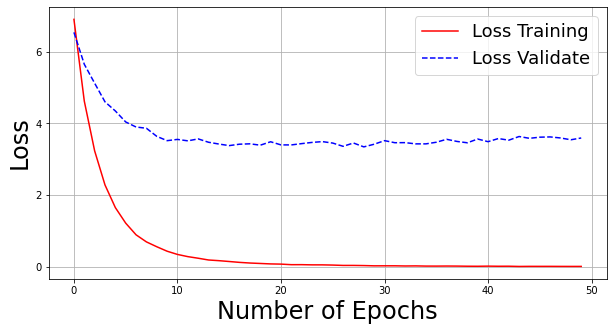

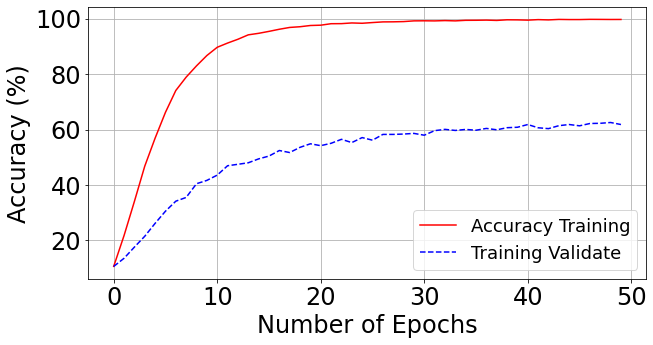

In [14]:
plotTraining(model_history,epochs,"loss")
plotTraining(model_history,epochs,"accuracy")
plotTraining(model_history,epochs,"val_loss")
plotTraining(model_history,epochs,"val_accuracy")

Sujeto 4


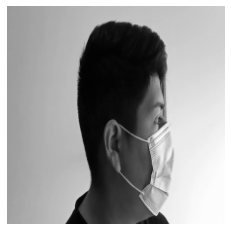

In [15]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model

names = ['Sujeto 1','Sujeto 2','Sujeto 3','Sujeto 4','Sujeto 5','Sujeto 6','Sujeto 7','Sujeto 8','Sujeto 9',
        'Sujeto 10','Sujeto 11']
#['AFRICAN FIREFINCH','ALBATROSS','ALEXANDRINE PARAKEET','AMERICAN AVOCET','AMERICAN BITTERN',
#         'AMERICAN COOT','AMERICAN GOLDFINCH','AMERICAN KESTREL','AMERICAN PIPIT','AMERICAN REDSTART']

modelt = load_model("/content/model_VGG16BW.h5")
#modelt = custom_model

imaget_path = "/content/drive/MyDrive/Hardcode/ENTRENAMIENTO_VGG/MTP/TEST/FLAVIO/frame18.jpg"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print(names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Found 1100 images belonging to 11 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       100
           1     1.0000    1.0000    1.0000       100
           2     1.0000    1.0000    1.0000       100
           3     1.0000    1.0000    1.0000       100
           4     0.9804    1.0000    0.9901       100
           5     1.0000    1.0000    1.0000       100
           6     1.0000    0.9800    0.9899       100
           7     1.0000    1.0000    1.0000       100
           8     1.0000    1.0000    1.0000       100
           9     0.0000    0.0000    0.0000       100
          10     0.0000    0.0000    0.0000       100

    accuracy                         0.8164      1100
   macro avg     0.8164    0.8164    0.8164      1100
weighted avg     0.8164    0.8164    0.8164      1100



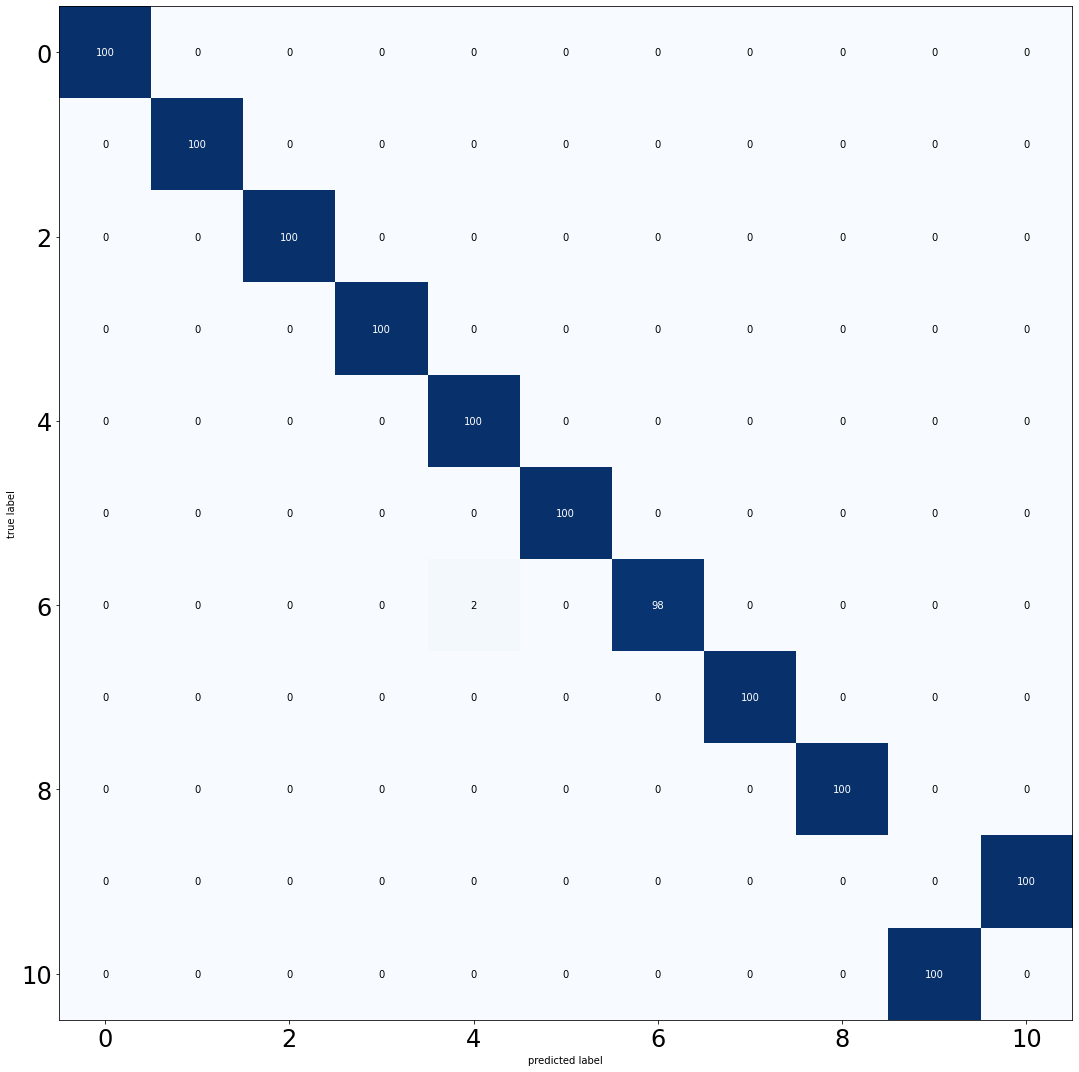

In [16]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


names = ['Sujeto 1','Sujeto 2','Sujeto 3','Sujeto 4','Sujeto 5','Sujeto 6','Sujeto 7','Sujeto 8','Sujeto 9',
        'Sujeto 10','Sujeto 11']


test_data_dir = '/content/drive/MyDrive/Hardcode/ENTRENAMIENTO_VGG/MTP/TEST'  

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)

custom_Model= load_model("/content/model_VGG16BW.h5")
#modelt = custom_model

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(15,15), show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))